# Visualizing the Results:
This dashboard provides an intuitive interface to explore results from the top_5_similar_buildings.xlsx dataset, generated by an NLP similarity model. The application allows users to interactively filter and inspect records based on similarity scores and row selection.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# prompt: /content/drive/MyDrive/time_machine_project/top_5_similar_buildings_withLinks.xlsx
# from the link above read the data set as pandas dataframe with an identical variable name, then give me the keys of that datasset

import pandas as pd

# Assuming the file path is correct and the file exists
file_path = '/content/drive/MyDrive/time_machine_project/top_5_similar_buildings_withLinks.xlsx'
try:
  top_5_similar_buildings_withLinks = pd.read_excel(file_path)
  print(top_5_similar_buildings_withLinks.keys())
except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except Exception as e:
  print(f"An error occurred: {e}")


Index(['Label', 'key_to_cluster', 'id_record', 'id_persistent', 'image_links',
       'archive_links', 'microfiche_links', 'microfiche_archive_links',
       'region_1', 'street_1', 'name_1', 'address_1', 'building_index_1',
       'cosine_similarity_1', 'region_2', 'street_2', 'name_2', 'address_2',
       'building_index_2', 'cosine_similarity_2', 'region_3', 'street_3',
       'name_3', 'address_3', 'building_index_3', 'cosine_similarity_3',
       'region_4', 'street_4', 'name_4', 'address_4', 'building_index_4',
       'cosine_similarity_4', 'region_5', 'street_5', 'name_5', 'address_5',
       'building_index_5', 'cosine_similarity_5'],
      dtype='object')


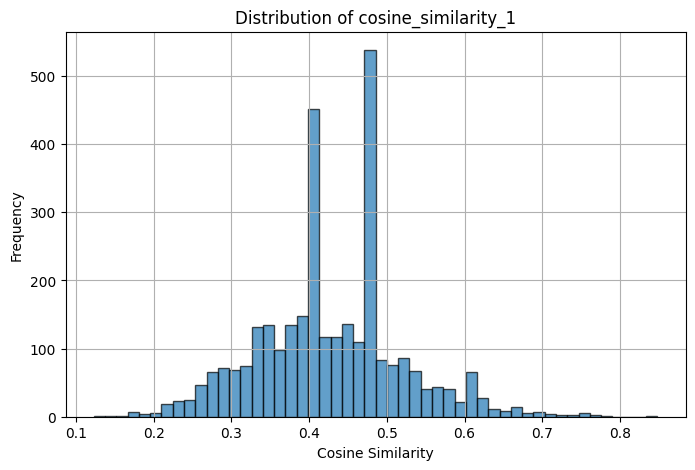

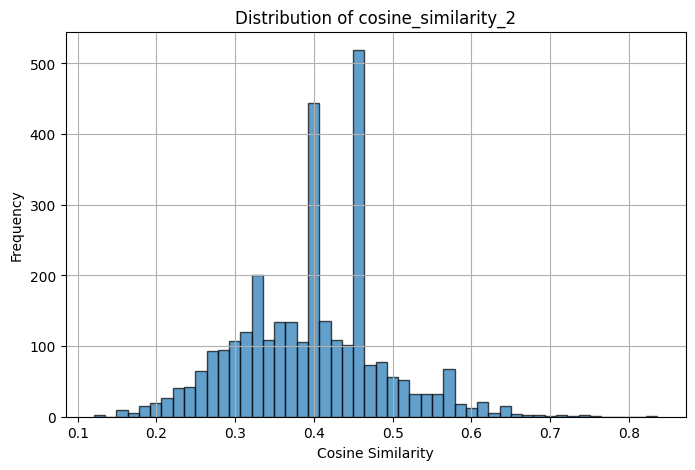

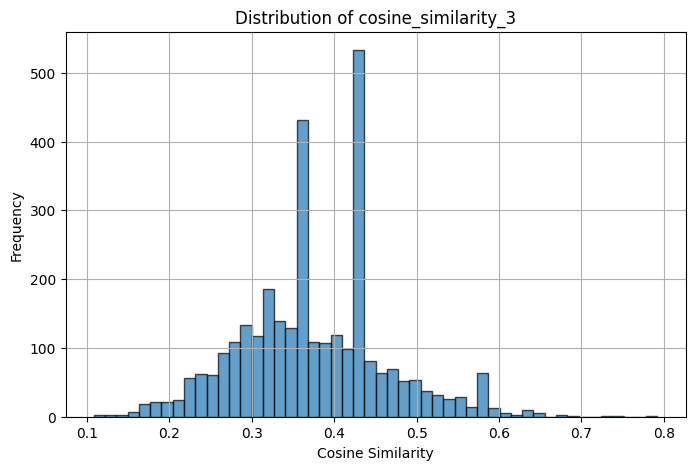

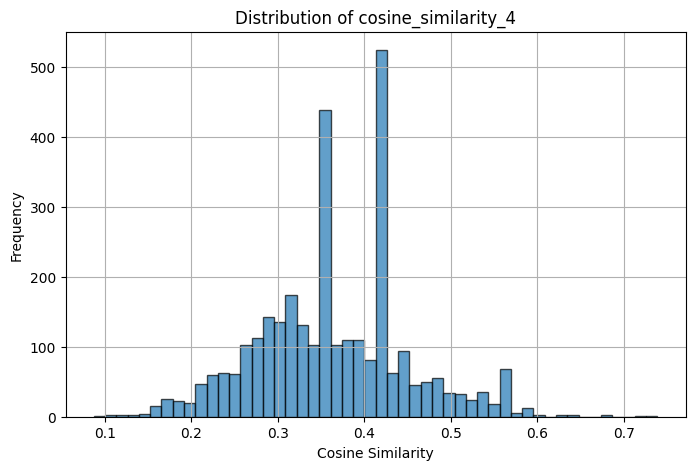

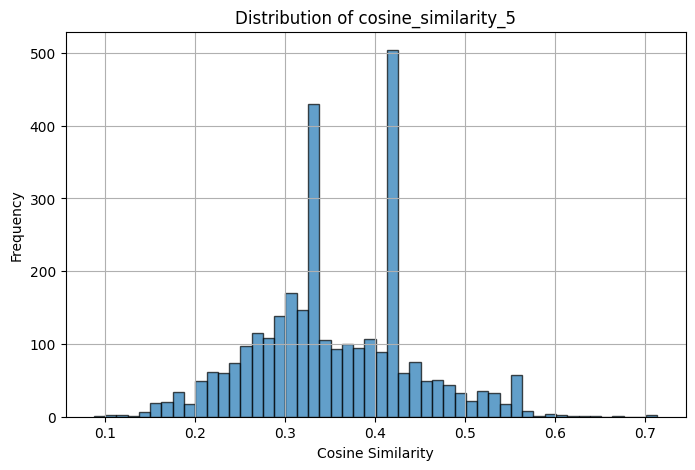

In [ ]:
import matplotlib.pyplot as plt

# Define the cosine similarity columns
cosine_cols = [
    'cosine_similarity_1', 'cosine_similarity_2', 'cosine_similarity_3',
    'cosine_similarity_4', 'cosine_similarity_5'
]

# Plot histograms for each cosine similarity column
for col in cosine_cols:
    plt.figure(figsize=(8, 5))
    plt.hist(top_5_similar_buildings_withLinks[col].dropna(), bins=50, alpha=0.7, edgecolor='black')
    plt.xlabel('Cosine Similarity')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.grid(True)
    plt.show()


In [ ]:
cosine_columns = [col for col in top_5_similar_buildings_withLinks.columns if 'cosine_similarity' in col]
top_5_similar_buildings_withLinks[cosine_columns] = top_5_similar_buildings_withLinks[cosine_columns].apply(lambda x: x.round(3))


In [ ]:
pip install dash pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 21.7 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
mport pandas as pd
import dash
from dash import dcc, html, dash_table
from dash.dependencies import Input, Output

# Load the dataset
  # Change to the correct path
df = top_5_similar_buildings_withLinks

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div([
    html.H1("NLP Model Results Dashboard", style={'textAlign': 'center'}),

    # Range input for selecting rows
    html.Label("Select Row Range:"),
    dcc.RangeSlider(
        id='row-range-slider',
        min=0,
        max=len(df)-1,
        step=1,
        value=[0, 10],
        marks={i: str(i) for i in range(0, len(df), max(1, len(df)//10))},
        tooltip={"placement": "bottom", "always_visible": True},
    ),

    # Display selected row range
    html.Div(id='selected-range-text', style={'margin': '10px 0', 'fontSize': '18px'}),

    # DataTable for results
    dash_table.DataTable(
        id='results-table',
        columns=[
            {"name": "Label", "id": "Label"},
            {"name": "Webpage", "id": "id_record", "presentation": "markdown"},

            #{"name": "Region 1", "id": "region_1"},
            #{"name": "Street 1", "id": "street_1"},
            {"name": "Name 1", "id": "name_1"},
            {"name": "Address 1", "id": "address_1"},
            #{"name": "Building Index 1", "id": "building_index_1"},
            {"name": "Cos_Sim 1", "id": "cosine_similarity_1"},

            #{"name": "Region 2", "id": "region_2"},
            #{"name": "Street 2", "id": "street_2"},
            {"name": "Name 2", "id": "name_2"},
            {"name": "Address 2", "id": "address_2"},
            #{"name": "Building Index 2", "id": "building_index_2"},
            {"name": "Cos_Sim 2", "id": "cosine_similarity_2"},

            #{"name": "Region 3", "id": "region_3"},
            #{"name": "Street 3", "id": "street_3"},
            {"name": "Name 3", "id": "name_3"},
            {"name": "Address 3", "id": "address_3"},
            #{"name": "Building Index 3", "id": "building_index_3"},
            {"name": "Cos_Sim 3", "id": "cosine_similarity_3"},

            #{"name": "Region 4", "id": "region_4"},
            #{"name": "Street 4", "id": "street_4"},
            {"name": "Name 4", "id": "name_4"},
            {"name": "Address 4", "id": "address_4"},
            #{"name": "Building Index 4", "id": "building_index_4"},
            {"name": "Cos_Sim 4", "id": "cosine_similarity_4"},

            #{"name": "Region 5", "id": "region_5"},
            #{"name": "Street 5", "id": "street_5"},
            {"name": "Name 5", "id": "name_5"},
            {"name": "Address 5", "id": "address_5"},
            #{"name": "Building Index 5", "id": "building_index_5"},
            {"name": "Cos_Sim 5", "id": "cosine_similarity_5"}
        ],
        style_table={'overflowX': 'auto'},
        style_header={'backgroundColor': 'lightgrey', 'fontWeight': 'bold'},
        style_data={'whiteSpace': 'normal', 'height': 'auto'},
        page_size=10
    )
])

# Define the callback function
@app.callback(
    [Output('selected-range-text', 'children'),
     Output('results-table', 'data')],
    [Input('row-range-slider', 'value')]
)
def update_table(selected_range):
    start, end = selected_range
    filtered_df = df.iloc[start:end].copy()

    # Convert webpage links to markdown for clickable URLs
    filtered_df["id_record"] = filtered_df["id_record"].apply(
        lambda x: f"[Link]({x})" if pd.notna(x) else "N/A"
    )

    return (
        f"Showing rows {start} to {end}",
        filtered_df.to_dict('records')
    )

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import dash
from dash import dcc, html, dash_table
from dash.dependencies import Input, Output

# Use the previously loaded dataset
df = top_5_similar_buildings_withLinks

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div([
    html.H1("NLP Model Results Dashboard", style={'textAlign': 'center'}),

    # Slider for cosine similarity threshold filter
    html.Label("Cosine Similarity Threshold:"),
    dcc.Slider(
        id='cosine-threshold-slider',
        min=0,
        max=1,
        step=0.01,
        value=0.5,  # default threshold
        marks={0: '0', 0.25: '0.25', 0.5: '0.5', 0.75: '0.75', 1: '1'},
        tooltip={"placement": "bottom", "always_visible": True},
    ),
    html.Br(),

    # Range input for selecting rows
    html.Label("Select Row Range:"),
    dcc.RangeSlider(
        id='row-range-slider',
        min=0,
        max=len(df)-1,
        step=1,
        value=[0, 10],
        marks={i: str(i) for i in range(0, len(df), max(1, len(df)//10))},
        tooltip={"placement": "bottom", "always_visible": True},
    ),

    # Display selected range and threshold info
    html.Div(id='selected-range-text', style={'margin': '10px 0', 'fontSize': '18px'}),

    # DataTable for results
    dash_table.DataTable(
        id='results-table',
        columns=[
            {"name": "Label", "id": "Label"},
            {"name": "Webpage", "id": "id_record", "presentation": "markdown"},
            {"name": "Name 1", "id": "name_1"},
            {"name": "Address 1", "id": "address_1"},
            {"name": "Cos_Sim 1", "id": "cosine_similarity_1"},
            {"name": "Name 2", "id": "name_2"},
            {"name": "Address 2", "id": "address_2"},
            {"name": "Cos_Sim 2", "id": "cosine_similarity_2"},
            {"name": "Name 3", "id": "name_3"},
            {"name": "Address 3", "id": "address_3"},
            {"name": "Cos_Sim 3", "id": "cosine_similarity_3"},
            {"name": "Name 4", "id": "name_4"},
            {"name": "Address 4", "id": "address_4"},
            {"name": "Cos_Sim 4", "id": "cosine_similarity_4"},
            {"name": "Name 5", "id": "name_5"},
            {"name": "Address 5", "id": "address_5"},
            {"name": "Cos_Sim 5", "id": "cosine_similarity_5"}
        ],
        style_table={'overflowX': 'auto'},
        style_header={'backgroundColor': 'lightgrey', 'fontWeight': 'bold'},
        style_data={'whiteSpace': 'normal', 'height': 'auto'},
        page_size=10
    )
])

# Define the callback function that updates the table based on row range and cosine threshold
@app.callback(
    [Output('selected-range-text', 'children'),
     Output('results-table', 'data')],
    [Input('row-range-slider', 'value'),
     Input('cosine-threshold-slider', 'value')]
)
def update_table(selected_range, threshold):
    # Filter rows based on the maximum cosine similarity across the five similarity columns
    cosine_cols = [
        'cosine_similarity_1', 'cosine_similarity_2', 'cosine_similarity_3',
        'cosine_similarity_4', 'cosine_similarity_5'
    ]
    filtered_df = df[df[cosine_cols].max(axis=1) >= threshold].copy()

    start, end = selected_range
    # Adjust the end index if it exceeds the number of filtered rows
    end = min(end, len(filtered_df))

    # Convert webpage links to markdown for clickable URLs
    filtered_df["id_record"] = filtered_df["id_record"].apply(
        lambda x: f"[Link]({x})" if pd.notna(x) else "N/A"
    )

    text = f"Showing rows {start} to {end} (out of {len(filtered_df)} rows) after applying cosine similarity threshold: {threshold}"
    return text, filtered_df.iloc[start:end].to_dict('records')

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>